In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def EulerMCRates(parameters):
    np.random.seed(1000)

    numSteps = parameters['setup']['numSteps']  
    numPaths = parameters['setup']['numPaths'] 
    dt = parameters['setup']['dt']


    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  
    
       
    r = np.zeros((numSteps + 1, numPaths),dtype=float)
    r[0,:] = r_0
  
    ################         simluations for short rate r(t)              ########
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            Zs = np.random.normal(0, 1, 1)  
            
            if m_name == 'Vasicek':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs # Vasicek model with Euler shceme
            elif m_name == 'CIR':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(r[t_step-1,i]*dt)*Zs # CIR model with Euler shceme
            
    return r
#=======================================================================================================

def EulerMCRates_Control(parameters):
    
    np.random.seed(1000)

   
    numSteps = parameters['setup']['numSteps']  
    numPaths = parameters['setup']['numPaths']  
    dt = parameters['setup']['dt']

    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  
       
    r_1 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_1[0,:] = r_0
    
    r_2 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_2[0,:] = r_0
  
    #=================== simluations for short rate r(t) =========================
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            Zs = np.random.normal(0, 1, 1)  
            Zs_minus = -Zs
            
            if m_name == 'Vasicek':            
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs # Vasicek model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs_minus # Vasicek model with Euler shceme
            elif m_name == 'CIR':
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(r_1[t_step-1,i]*dt)*Zs # CIR model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(r_2[t_step-1,i]*dt)*Zs_minus # CIR model with Euler shceme
            
    return r_1, r_2, (r_1+r_2)/2


def EulerMCRates_Antithetic(parameters):  
    
    np.random.seed(1000)

    numSteps = parameters['setup']['numSteps']  
    numPaths = parameters['setup']['numPaths']  
    dt = parameters['setup']['dt']
    
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma'] 
    
    # simulation    
    r_1 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_1[0,:] = r_0
    
    r_2 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_2[0,:] = r_0
    
    #=================== simluations for short rate r(t) =========================
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            U1 = np.random.rand()  
            Zs_1 = norm.ppf(U1)  
            Zs_2 = norm.ppf(1-U1)            
            
            
            if m_name == 'Vasicek':
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs_1 # Vasicek model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs_2 # 
            elif m_name == 'CIR':
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(r_1[t_step-1,i]*dt)*Zs_1 # CIR model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(r_2[t_step-1,i]*dt)*Zs_2 # 
 
            
    return r_1, r_2, (r_1+r_2)/2

#=======================================================================================================

def MC_BondPriceYield(MC_short_rates, parameters):
    
    T_Maturity = parameters['setup']['T']  
    numSteps = parameters['setup']['numSteps'] 
    numPaths = parameters['setup']['numPaths']  
    dt = parameters['setup']['dt']

    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  

    numSteps = parameters['setup']['numSteps'] 
    numPaths = parameters['setup']['numPaths']  
    dt = parameters['setup']['dt']

    A = np.zeros((numSteps+1,1))
    B = np.zeros((numSteps+1,1))
    Bond_Prices = np.zeros((numSteps+1, numPaths))
    Bond_Yields = np.zeros((numSteps+1, numPaths))
    for j in range(numSteps+1):  
        tao_j = T_Maturity - j*dt  
        
        if m_name == 'Vasicek':
            gamma = a**2*b - sigma**2/2
            B[j][0] = (1-np.exp(-a*tao_j))/a
            A[j][0] = (B[j][0]-tao_j)*gamma/a - sigma**2*B[j][0]**2/(4*a)            
        elif m_name == 'CIR':
            gamma = np.sqrt(a** 2 + 2 * sigma ** 2)            
            B[j][0] = 2 * (np.exp(gamma * tao_j) - 1) / (
                         (gamma + a) * (np.exp(gamma * tao_j) - 1) + 2 * gamma)
            A[j][0] = np.log(np.power(2 * gamma * np.exp((gamma + a) * tao_j / 2) / ((gamma + a) *
                               (np.exp(gamma * tao_j) - 1) + 2 * gamma), 2 * a *b / (sigma ** 2)))
            
           
        
        for i in range(numPaths):
            Bond_Prices[j][i] = np.exp(A[j][0] - B[j][0] * MC_short_rates[j][i])  
            
            if tao_j > 0:
                Bond_Yields[j][i] = -np.log(Bond_Prices[j][i])/tao_j
            else:
                Bond_Yields[j][i] = MC_short_rates[j][i]  

    return Bond_Prices,Bond_Yields 


def TermStructure_Giventime(Rates_time_t, T_Maturity, parameters):
    
    numSteps = parameters['setup']['numSteps']  
    numPaths = parameters['setup']['numPaths']  
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  

    numSteps = parameters['setup']['numSteps'] 
    numPaths = parameters['setup']['numPaths']  
    dt = parameters['setup']['dt']
    
    n = len(T_Maturity)
    num_t = len(Rates_time_t)

    TS_yields = np.zeros((num_t, n))

    for t  in range(num_t):
        r_t = Rates_time_t[t]
        for T_i in T_Maturity: 
            if T_i == 0:
                TS_yields[t][0] = r_t
            else:
                tao_j = T_i  
                
                if m_name == 'Vasicek':
                    gamma = a**2*b - sigma**2/2
                    B = (1-np.exp(-a*tao_j))/a
                    A = (B-tao_j)*gamma/a - sigma**2*B**2/(4*a)            
                elif m_name == 'CIR':
                    gamma = np.sqrt(a** 2 + 2 * sigma ** 2)            
                    B = 2 * (np.exp(gamma * tao_j) - 1) / (
                                 (gamma + a) * (np.exp(gamma * tao_j) - 1) + 2 * gamma)
                    A = np.log(np.power(2 * gamma * np.exp((gamma + a) * tao_j / 2) / ((gamma + a) *
                                       (np.exp(gamma * tao_j) - 1) + 2 * gamma), 2 * a *b / (sigma ** 2)))
                
                TS_yields[t][T_Maturity.index(T_i)] = -(A - B * r_t) / tao_j
    
    return TS_yields



def EulerMCForwardRates(parameters):
    np.random.seed(1000)

    # time setup
    T = parameters['setup']['T']  
    numSteps = parameters['setup']['numSteps']  
    numPaths = parameters['setup']['numPaths']  
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  
    gamma= np.sqrt(a**2+2*sigma**2)
    
    # simulation    
    f_rate = np.zeros((numSteps + 1, numPaths),dtype=float)
    f_rate[0,:] = r_0 
    
    diffusion = np.zeros((numSteps+1,1), dtype = float)
    drift = np.zeros((numSteps+1,1), dtype = float)
  
    #=================== simluations for short rate r(t) =========================
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            Zs = np.random.normal(0, 1, 1)  
            
            if m_name == 'Vasicek':
                tau = T- t_step*dt
                
                item1 = np.exp(-a*tau)
                item2 = np.exp(-2*a*tau)
                diffusion[t_step][0] = sigma*item1
                drift[t_step][0] = (sigma**2/a)*(item1-item2)
                
                # Vasicek model with Euler shceme
                f_rate[t_step,i] = f_rate[t_step-1,i] + drift[t_step][0]*dt + diffusion[t_step][0]*np.sqrt(dt)*Zs 
            
            elif m_name == 'CIR':
         
                tau = T- t_step*dt
                C = np.exp(tau*gamma)
                diffusion[t_step][0] = (4*C*(gamma**2)*sigma*np.sqrt(f_rate[t_step-1,i]))/((gamma-a+C*(a+gamma))**2)
                drift[t_step][0] = (4*C*(gamma**3)*f_rate[t_step-1,i]*(a-gamma+C*(a+gamma)))/((gamma-a+C*(a+gamma))**3)+(4*a*C*(gamma**2)*(b-f_rate[t_step-1,i]))/((gamma-a+C*(a+gamma))**2)+(2*a*b*C*(gamma**2)*(a-gamma)*(a+gamma))/((sigma**2)*(gamma-a+C*(a+gamma))**2)
                
                # CIR model with Euler shceme
                f_rate[t_step,i] = f_rate[t_step-1,i] + drift[t_step][0]*dt + diffusion[t_step][0]*np.sqrt(dt)*Zs
                
    return f_rate, drift, diffusion

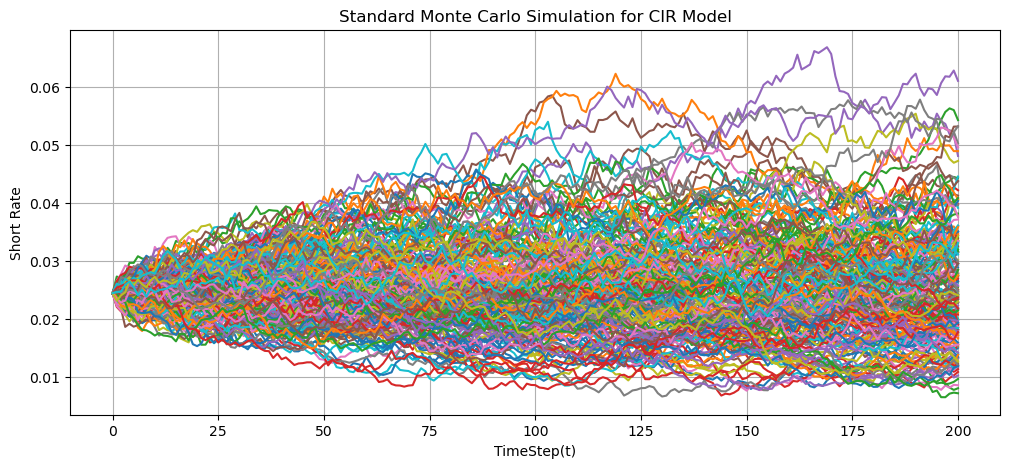

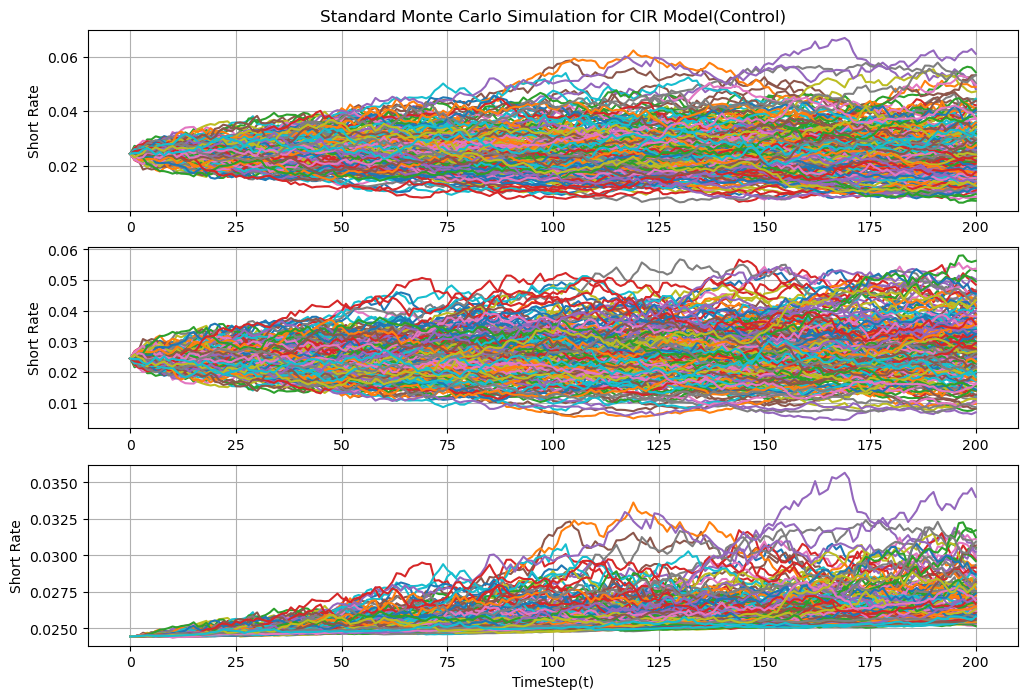

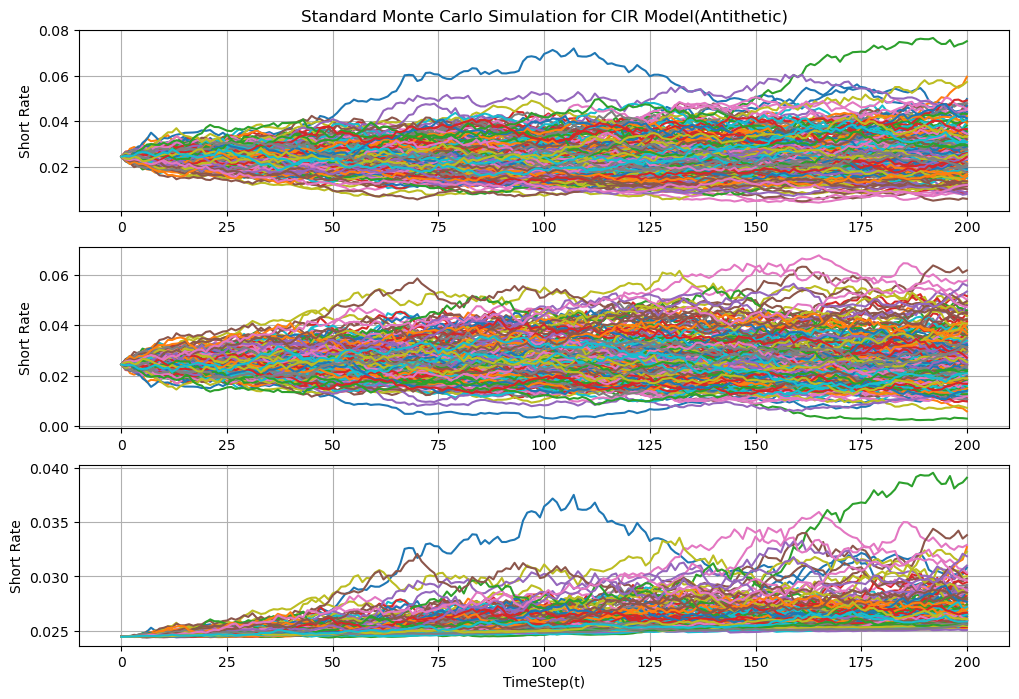

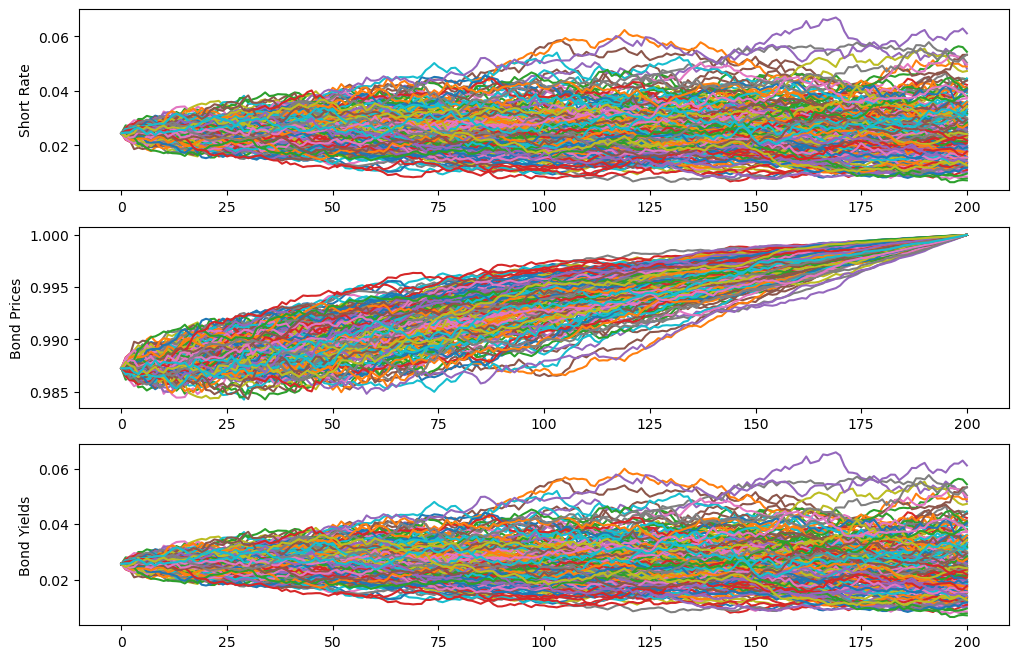

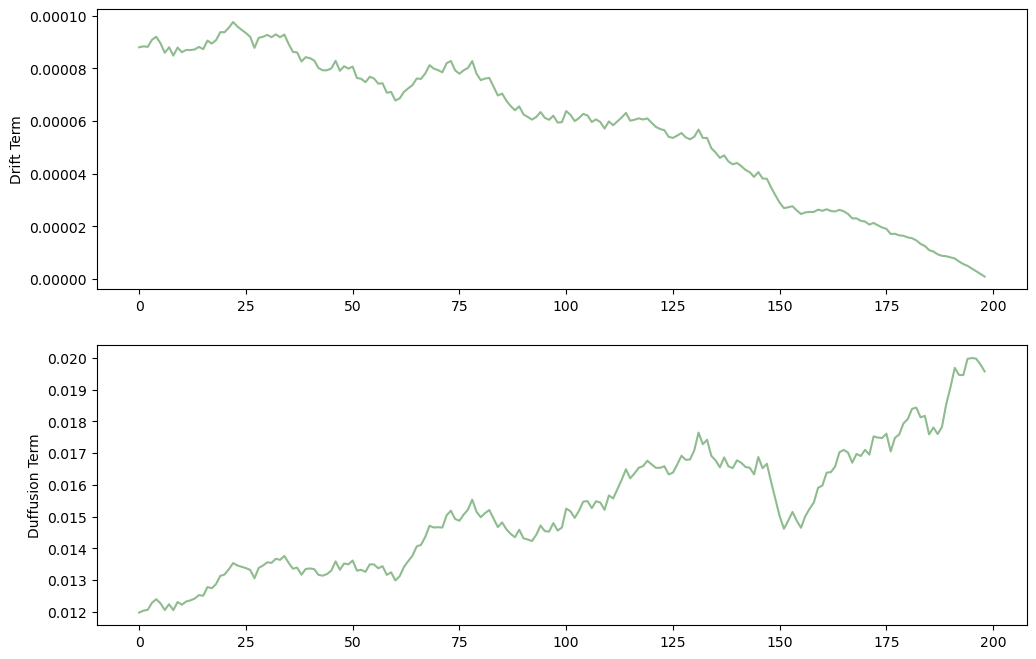

In [2]:
if __name__ == '__main__':
    
    r0 = 0.0244499226645435
    m_name = 'CIR'
    a = 0.808659322205384
    b = 0.0313747156454418
    sigma = 0.114732029254583
    
    
    T = 0.5    
    N = 200  
    dt = T/N
    M = 200
    
    parameters = {'model':{'r0':r0, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    
    # The outcome & plot of standard Monte Carlo Simulation
    Sim_r = EulerMCRates(parameters)
    rs_df = pd.DataFrame(Sim_r)
    rs_df.to_csv("MC_short_rates.csv")
    

    plt.figure(figsize=(12,5))
    plt.plot(Sim_r)
    plt.grid(True)
    plt.xlabel('TimeStep(t)')
    plt.ylabel('Short Rate')
    plt.title('Standard Monte Carlo Simulation for CIR Model')
    


    [Sim_r1, Sim_r2, Sim_r3] = EulerMCRates_Control(parameters)
    
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1)
    plt.plot(Sim_r1)
    plt.grid(True)
    plt.ylabel('Short Rate')
    plt.title('Standard Monte Carlo Simulation for CIR Model(Control)')
    
    plt.subplot(3,1,2)
    plt.plot(Sim_r2)
    plt.grid(True)
    plt.ylabel('Short Rate')
    
    plt.subplot(3,1,3)
    plt.plot(Sim_r3)
    plt.grid(True)
    plt.xlabel('TimeStep(t)')
    plt.ylabel('Short Rate')
    
    [Sim_r4, Sim_r5, Sim_r6] = EulerMCRates_Antithetic(parameters)
    
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1)
    plt.plot(Sim_r4)
    plt.grid(True)
    plt.ylabel('Short Rate')
    plt.title('Standard Monte Carlo Simulation for CIR Model(Antithetic)')
    
    plt.subplot(3,1,2)
    plt.plot(Sim_r5)
    plt.grid(True)
    plt.ylabel('Short Rate')
    
    plt.subplot(3,1,3)
    plt.plot(Sim_r6)
    plt.grid(True)
    plt.xlabel('TimeStep(t)')
    plt.ylabel('Short Rate')
    
#=======================================================================================================    
    [MC_bond_prices, MC_bond_yields] = MC_BondPriceYield(Sim_r, parameters)
   
    rs_df = pd.DataFrame(MC_bond_yields)
    rs_df.to_csv("MC_bond_yields.csv")
       
    Terms = ['0.5', '1', '3', '5', '7', '9', '10', '15', '18', '20', '25', '30']
    T_Maturity = list(map(float, Terms))
    N_t = 100
    
    Rates_t = np.transpose(Sim_r)[:,N_t]   # now Paths x Steps
    
    TS_yields = TermStructure_Giventime(Rates_t, T_Maturity, parameters)
    
    rs_df = pd.DataFrame(TS_yields)
    rs_df.to_csv("simulated_TS.csv")
    
    plt.figure(figsize=(12, 8))
    plt.title('Short-Rates, Bond Prices and Yields for CIR Model')
    plt.subplot(3, 1, 1)
    plt.plot(Sim_r)  
    plt.ylabel('Short Rate')   

    plt.subplot(3, 1, 2)
    plt.plot(MC_bond_prices)  
    plt.ylabel('Bond Prices')
    
    plt.subplot(3, 1, 3)
    plt.plot(MC_bond_yields)  
    plt.ylabel('Bond Yields')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    plt.plot(T_Maturity, np.transpose(TS_yields))

    plt.xlabel('Time to Maturity (T-t)')
    plt.ylabel('Term Structure of Yields')
    plt.title('Term Structure of Yields for CIR Model')

    plt.show()  
 
 #=======================================================================================================
    
    [MC_forward_rates, drift, diffusion] = EulerMCForwardRates(parameters)  

    rs_df = pd.DataFrame(MC_forward_rates)
    rs_df.to_csv("MC_forward_rates.csv")
    
      
    plt.figure(figsize=(12, 8))
    plt.title('Short-Rates r(t) (in green) vs Forward Rates F(t,T) (in red) in CIR Model')
    plt.plot(Sim_r, 'g', label='r(t)')  
    plt.plot(MC_forward_rates,'r.', label='F(t,T)')  
   
    plt.grid(True)
   
    plt.ylabel('Rate')  
    plt.show()

    plt.figure(figsize=(12, 8)) 
    plt.subplot(2, 1, 1)
    plt.plot(drift[1:-1],"darkseagreen")  # Time series of drift terms over time by ingoring the first one 
    plt.ylabel('Drift Term')
    
    plt.subplot(2, 1, 2)
    plt.plot(diffusion[1:-1],"darkseagreen")  # Time series of diffusion terms over time by ingoring the first one 
    plt.ylabel('Duffusion Term')
    plt.show()    

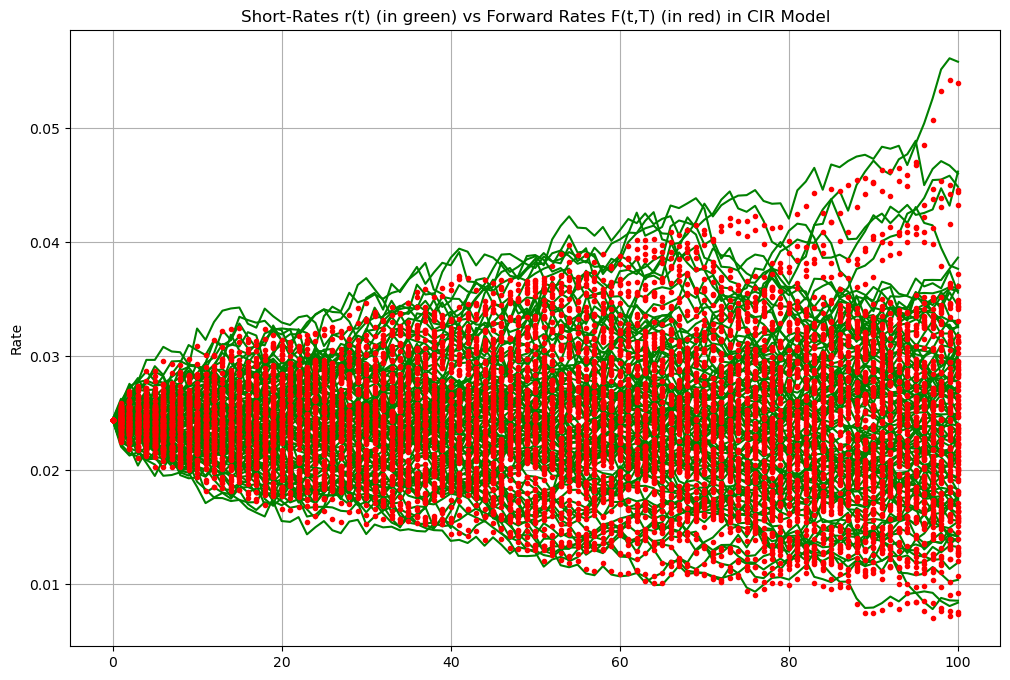

In [3]:
if __name__ == '__main__':

    r0 = 0.0244499226645435
    m_name = 'CIR'
    a = 0.808659322205384
    b = 0.0313747156454418
    sigma = 0.114732029254583
    

    T1 = 0.25     
    N1 = 100  
    dt = T1/N1
    M1 = 100
    
    New_parameters = {'model':{'r0':r0, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T1, 'numSteps':N1, 'dt': T1/N1, 'numPaths':M1}                
                 }
    
    Sim_r_1 = EulerMCRates(New_parameters)
    
    [MC_forward_rates_1, drift_1, diffusion_1] = EulerMCForwardRates(New_parameters)  
   
    rs_df = pd.DataFrame(MC_forward_rates_1)
    rs_df.to_csv("MC_forward_rates_1.csv")
    
    
      
   
    plt.figure(figsize=(12, 8))
    plt.title('Short-Rates r(t) (in green) vs Forward Rates F(t,T) (in red) in CIR Model')
    plt.plot(Sim_r_1, 'g', label='r(t)')  
    plt.plot(MC_forward_rates_1,'r.', label='F(t,T)') 
   
    plt.grid(True)
    
    plt.ylabel('Rate')  
    plt.show()

    plt.figure(figsize=(12, 8)) 
    plt.subplot(2, 1, 1)
    plt.plot(drift_1[1:-1],"darkseagreen")  # Time series of drift terms over time by ingoring the first one 
    plt.ylabel('Drift Term')
    
    plt.subplot(2, 1, 2)
    plt.plot(diffusion_1[1:-1],"darkseagreen")  # Time series of diffusion terms over time by ingoring the first one 
    plt.ylabel('Duffusion Term')
    plt.show()

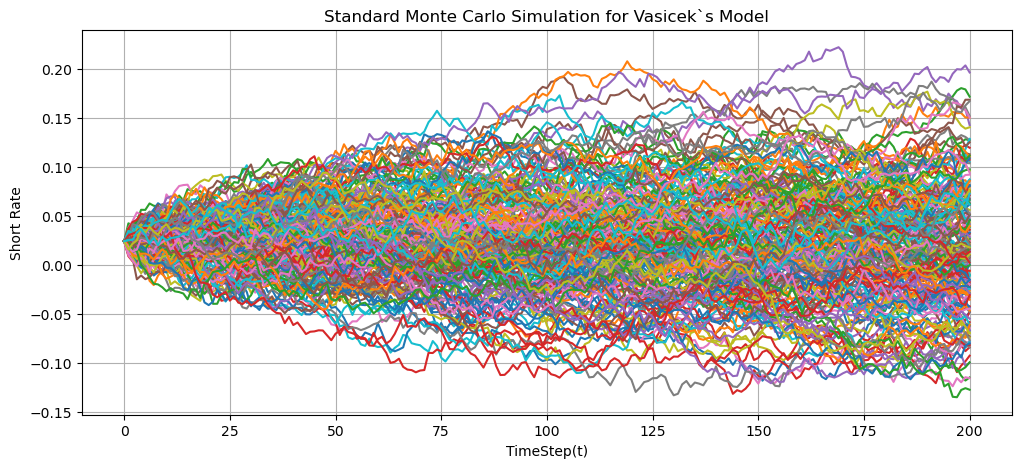

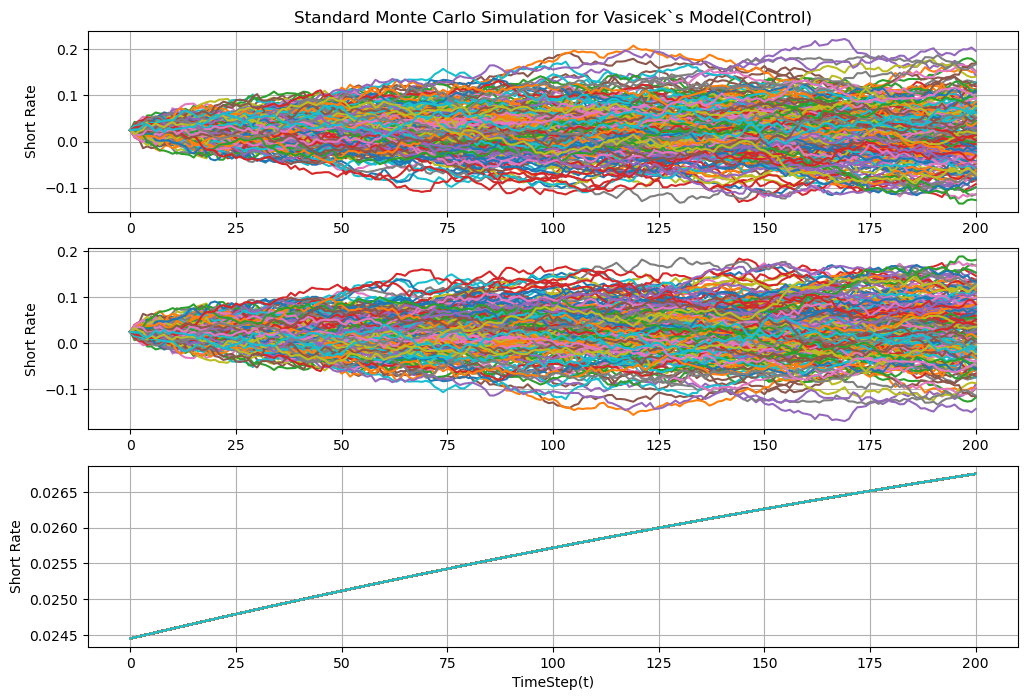

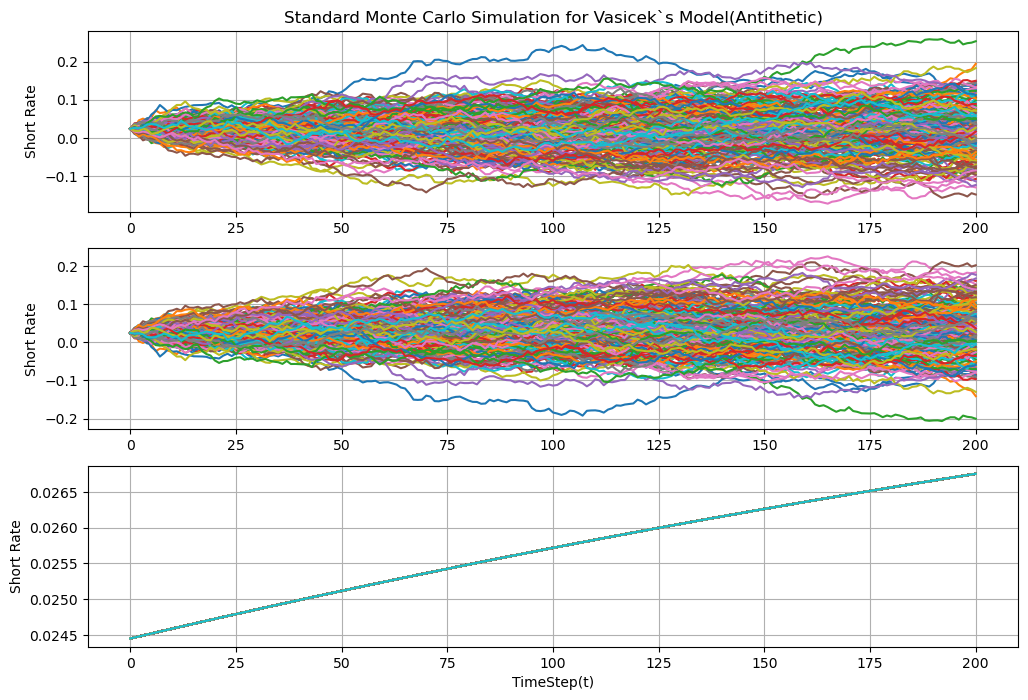

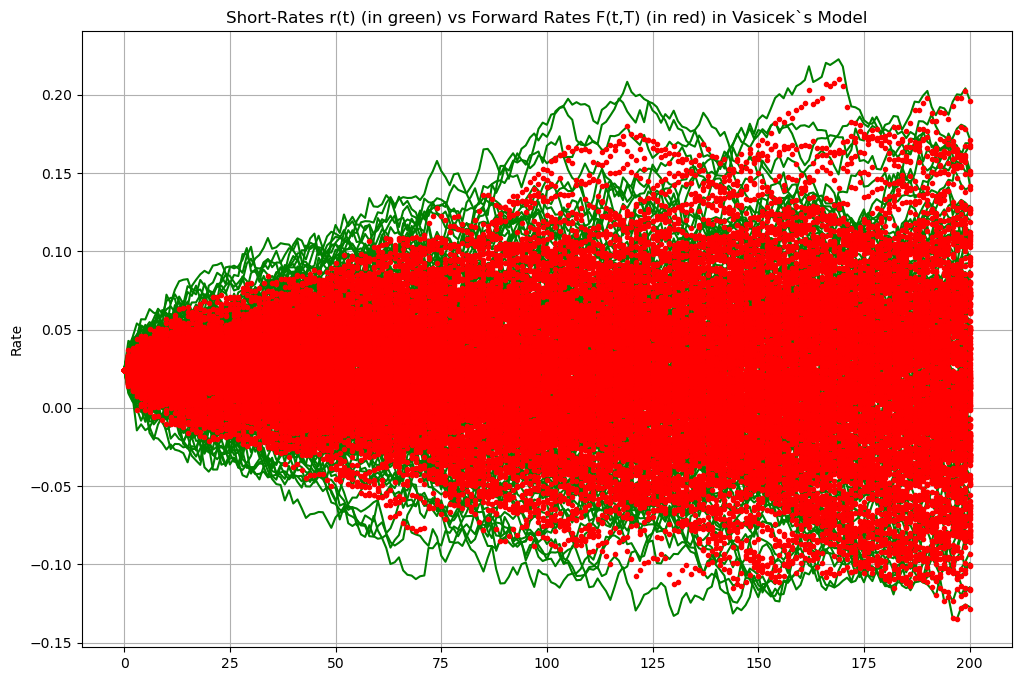

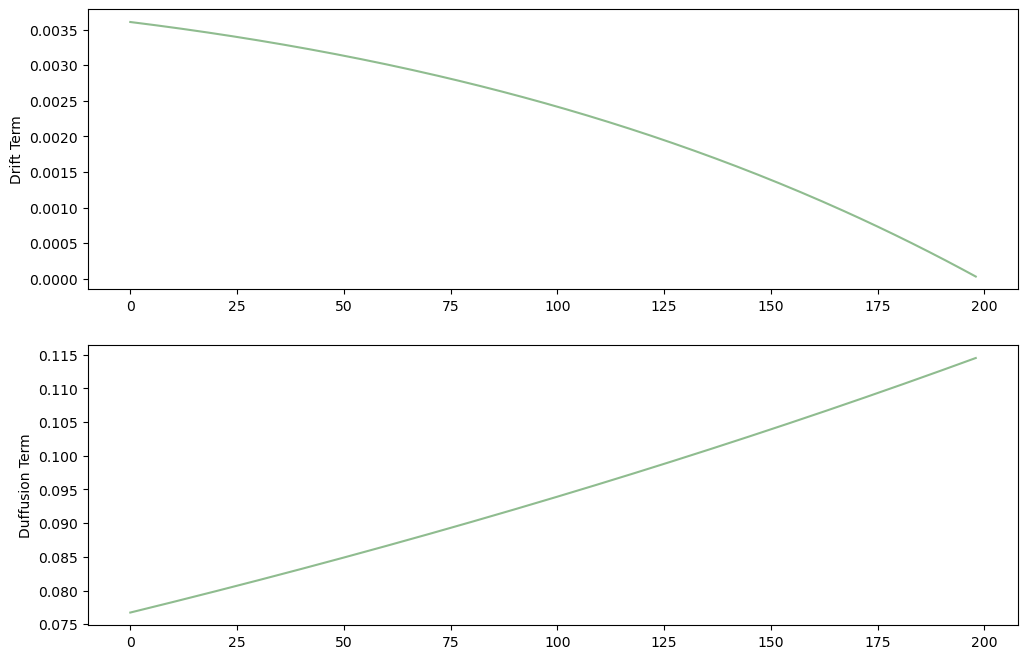

In [4]:
if __name__ == '__main__':

    r0 = 0.0244499226645435
    

    m_name = 'Vasicek'
    a = 0.808659322205384
    b = 0.0313747156454418
    sigma = 0.114732029254583
    
    
    T = 0.5     
    N = 200  
    dt = T/N
    M = 200
    
    parameters = {'model':{'r0':r0, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    
   
    Sim_r = EulerMCRates(parameters)
    rs_df = pd.DataFrame(Sim_r)
    rs_df.to_csv("MC_short_rates.csv")
    

    plt.figure(figsize=(12,5))
    plt.plot(Sim_r)
    plt.grid(True)
    plt.xlabel('TimeStep(t)')
    plt.ylabel('Short Rate')
    plt.title('Standard Monte Carlo Simulation for Vasicek`s Model')
    
    
    [Sim_r1, Sim_r2, Sim_r3] = EulerMCRates_Control(parameters)
    
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1)
    plt.plot(Sim_r1)
    plt.grid(True)
    plt.ylabel('Short Rate')
    plt.title('Standard Monte Carlo Simulation for Vasicek`s Model(Control)')
    
    plt.subplot(3,1,2)
    plt.plot(Sim_r2)
    plt.grid(True)
    plt.ylabel('Short Rate')
   
    
    plt.subplot(3,1,3)
    plt.plot(Sim_r3)
    plt.grid(True)
    plt.xlabel('TimeStep(t)')
    plt.ylabel('Short Rate')
    
    
    [Sim_r4, Sim_r5, Sim_r6] = EulerMCRates_Antithetic(parameters)
    
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1)
    plt.plot(Sim_r4)
    plt.grid(True)
    plt.ylabel('Short Rate')
    plt.title('Standard Monte Carlo Simulation for Vasicek`s Model(Antithetic)')
    
    plt.subplot(3,1,2)
    plt.plot(Sim_r5)
    plt.grid(True)
    plt.ylabel('Short Rate')
   
    plt.subplot(3,1,3)
    plt.plot(Sim_r6)
    plt.grid(True)
    plt.xlabel('TimeStep(t)')
    plt.ylabel('Short Rate')
    
#=======================================================================================================
    [MC_forward_rates, drift, diffusion] = EulerMCForwardRates(parameters)  # Steps X Paths
   
    rs_df = pd.DataFrame(MC_forward_rates)
    rs_df.to_csv("MC_forward_rates.csv")
    
      
   
    plt.figure(figsize=(12, 8))
    plt.title('Short-Rates r(t) (in green) vs Forward Rates F(t,T) (in red) in Vasicek`s Model')
    plt.plot(Sim_r, 'g', label='r(t)')  # times short-rates paths
    plt.plot(MC_forward_rates,'r.', label='F(t,T)')  # times forward-rate paths
    
    plt.grid(True)
    
    plt.ylabel('Rate')  
    plt.show()

    plt.figure(figsize=(12, 8)) 
    plt.subplot(2, 1, 1)
    plt.plot(drift[1:-1],"darkseagreen")  
    plt.ylabel('Drift Term')
    
    plt.subplot(2, 1, 2)
    plt.plot(diffusion[1:-1],"darkseagreen")  
    plt.ylabel('Duffusion Term')
    plt.show()    

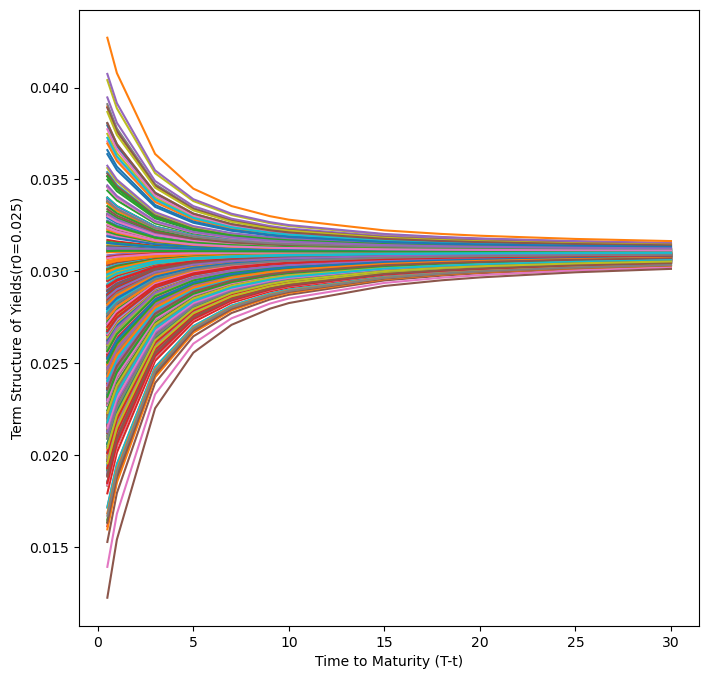

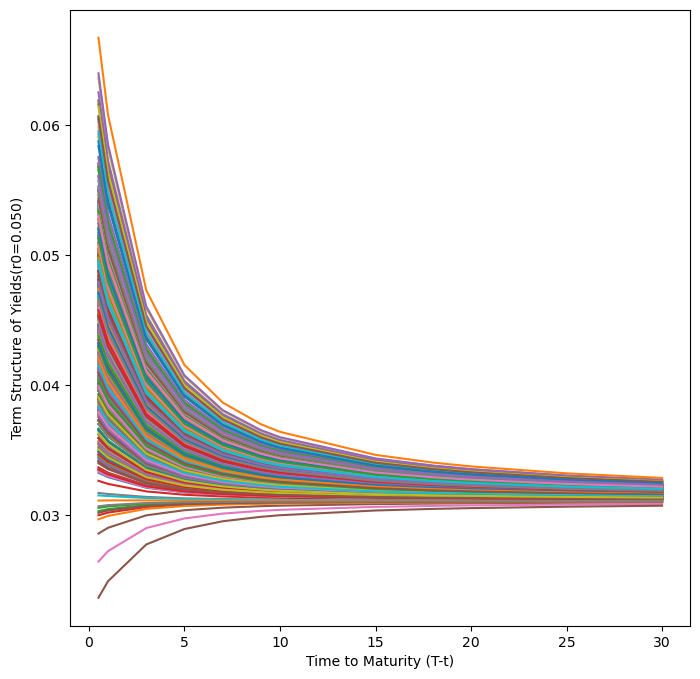

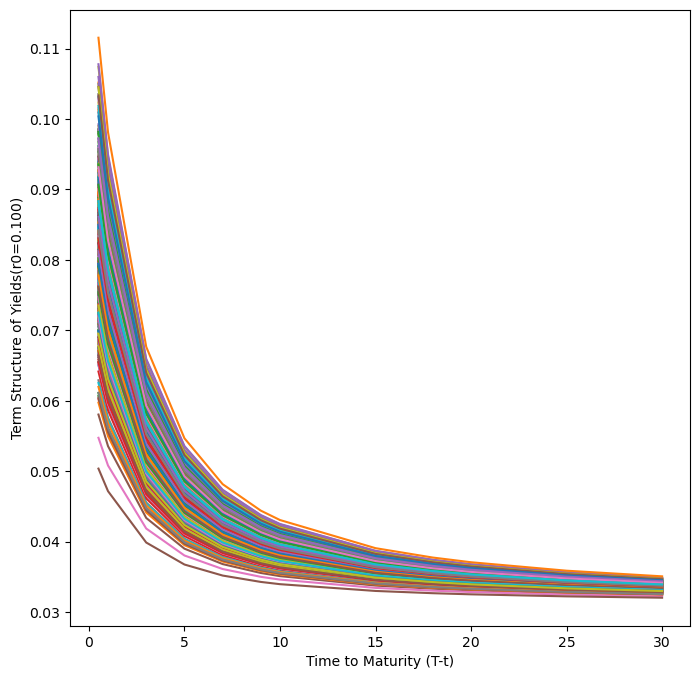

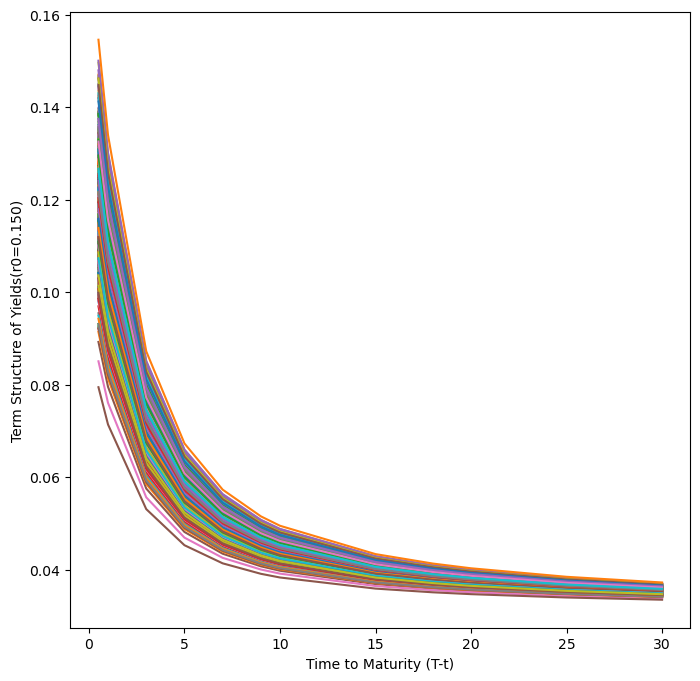

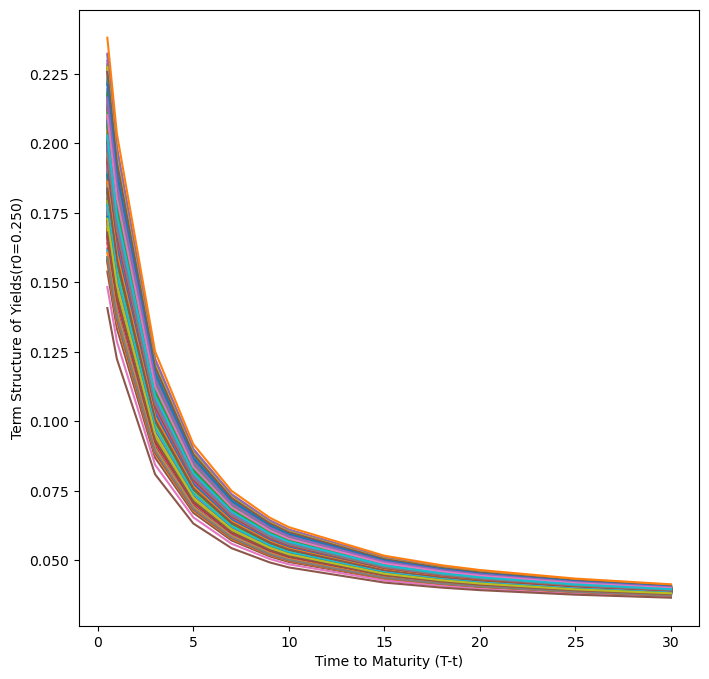

In [5]:
if __name__ == '__main__':

    m_name = 'CIR'
    a = 0.808659322205384
    b = 0.0313747156454418
    sigma =0.114732029254583 
    
    r0_1 = 0.025 # Speed of mean reversion
    r0_2 = 0.050
    r0_3 = 0.100
    r0_4 = 0.150
    r0_5 = 0.250
    

    T = 0.4     
    N = 150 
    dt = T/N
    M = 500
    
    parameters_1 = {'model':{'r0':r0_1, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    parameters_2 = {'model':{'r0':r0_2, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    parameters_3 = {'model':{'r0':r0_3, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    parameters_4 = {'model':{'r0':r0_4, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    parameters_5 = {'model':{'r0':r0_5, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }

    
    
    # Conduct a standard Monte Carlo simulation for Vasicek Model and CIR model
    MC_shortrates_1 = EulerMCRates(parameters_1)
    MC_shortrates_2 = EulerMCRates(parameters_2)
    MC_shortrates_3 = EulerMCRates(parameters_3)
    MC_shortrates_4 = EulerMCRates(parameters_4)
    MC_shortrates_5 = EulerMCRates(parameters_5)
    
    # Estimate the term structure of yileds at time 0<t<T, given T=[0.5, 1, 3, 5, 7, 9, 10, 15, 18, 20, 25, 30]    
    Terms = ['0.5', '1', '3', '5', '7', '9', '10', '15', '18', '20', '25', '30']
    T_Maturity = list(map(float, Terms))
    N_t = 50
    
    Rates_t_1 = np.transpose(MC_shortrates_1)[:,N_t]
    Rates_t_2 = np.transpose(MC_shortrates_2)[:,N_t]
    Rates_t_3 = np.transpose(MC_shortrates_3)[:,N_t]
    Rates_t_4 = np.transpose(MC_shortrates_4)[:,N_t]
    Rates_t_5 = np.transpose(MC_shortrates_5)[:,N_t]
    
  
    TS_yields_1 = TermStructure_Giventime(Rates_t_1, T_Maturity, parameters_1)
    TS_yields_2 = TermStructure_Giventime(Rates_t_2, T_Maturity, parameters_2)
    TS_yields_3 = TermStructure_Giventime(Rates_t_3, T_Maturity, parameters_3)
    TS_yields_4 = TermStructure_Giventime(Rates_t_4, T_Maturity, parameters_4)
    TS_yields_5 = TermStructure_Giventime(Rates_t_5, T_Maturity, parameters_5)
    
    plt.figure(figsize=(8, 8))
    plt.plot(T_Maturity, np.transpose(TS_yields_1)) 
    plt.xlabel('Time to Maturity (T-t)')
    plt.ylabel('Term Structure of Yields(r0=0.025)') 
    plt.show()

    plt.figure(figsize=(8, 8))
    plt.plot(T_Maturity, np.transpose(TS_yields_2)) 
    plt.xlabel('Time to Maturity (T-t)')
    plt.ylabel('Term Structure of Yields(r0=0.050)')
    plt.show()
    
    plt.figure(figsize=(8, 8))
    plt.plot(T_Maturity, np.transpose(TS_yields_3)) 
    plt.xlabel('Time to Maturity (T-t)')
    plt.ylabel('Term Structure of Yields(r0=0.100)') 
    plt.show()
    
    plt.figure(figsize=(8, 8))
    plt.plot(T_Maturity, np.transpose(TS_yields_4)) 
    plt.xlabel('Time to Maturity (T-t)')
    plt.ylabel('Term Structure of Yields(r0=0.150)') 
    plt.show()
    
    plt.figure(figsize=(8, 8))
    plt.plot(T_Maturity, np.transpose(TS_yields_5)) 
    plt.xlabel('Time to Maturity (T-t)')
    plt.ylabel('Term Structure of Yields(r0=0.250)') 
    plt.show()